# Лабораторна робота №3
## Злиття датафреймів, агрегування даних та візуалізація даних
<br /><br/>
### Виконав
### студентка групи КН-221а
### Єфіменко Анастасія Миколаївна
### Перевірив
### асистент кафедри
### Звєрцев Герман Олександрович
<br /><br/><br/><br/>
## Мета роботи 
**Вивчення функцій Pandas для злиття, агрегування та візуалізації даних**

## Хід роботи
1. Завантажено файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.
Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими: <br />
**['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable]** <br />
2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN. <br />
3. Перейменуйте наступний список країн: <br />
**"Republic of Korea": "South Korea",  <br />
"United States of America": "United States",  <br />
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",  <br />
"China, Hong Kong Special Administrative Region": "Hong Kong"** <br />
4. Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)

# Завдання 1: Завантаження даних та виправлення формату стовпців
Energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)
Energy = Energy.iloc[:, 2:]
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Завдання 2: Конвертація в гДж та обробка відсутніх значень
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors='coerce') * 1000000
Energy['Energy Supply per Capita'] = pd.to_numeric(Energy['Energy Supply per Capita'], errors='coerce')

# Завдання 3: Перейменування країн
country_mapping = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

Energy['Country'].replace(country_mapping, inplace=True)

# Завдання 4: Видалення цифр та дужок з назв країн
Energy['Country'].replace(to_replace = r'\d+', value = '', regex = True, inplace = True)
Energy['Country'] = Energy['Country'].replace(to_replace = r'\(.*\)', value = '', regex = True).str.strip()

# Вивід результатів для заданих країн
Energy.loc[Energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
164,South Korea,11007000000.000,221.000,2.279


5. Далі, завантажено дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року.
Обов’язково НЕ включайте заголовок до датафрейму і перейменуйте
наступний список країн:  <br />
**"Korea, Rep.": "South Korea",  <br />
"Iran, Islamic Rep.": "Iran",  <br />
"Hong Kong SAR, China": "Hong Kong"**

In [3]:
# Завдання 5: Завантаження даних про ВВП
GDP = pd.read_csv('gpd.csv', skiprows=4)

GDP['Country Name'] = GDP['Country Name'].replace({'Korea, Rep.': 'South Korea',
                                         'Iran, Islamic Rep.': 'Iran',
                                         'Hong Kong SAR, China': 'Hong Kong'})

GDP = GDP[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


6. Завантажено дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій. <br />
7. Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн). <br />
<ul>
    <li>Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)</li>
    <li>Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].</li>
</ul>
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [4]:
# Завдання 6: Завантаження даних з файлу "scimagojr.xlsx"
scimagojr = pd.read_excel('scimagojr.xlsx')

# Завдання 7: Приєднання три набори даних
merged_df = pd.merge(scimagojr, Energy, how='outer', left_on='Country', right_on='Country')
merged_df = pd.merge(merged_df, GDP, how='inner', left_on='Country', right_on='Country Name')

selected_columns = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                     '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Result = merged_df[selected_columns].set_index('Country').head(15)

Result.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1.000,127050.000,126767.000,597237.000,411683.000,4.700,138.000,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2.000,96661.000,94747.000,792274.000,265436.000,8.200,230.000,NaN,NaN,NaN,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3.000,30504.000,30287.000,223024.000,61554.000,7.310,134.000,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [5]:
Result.shape

(15, 20)

8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років. <br />
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.

In [6]:
def task_eight():
    avg_gdp = Result[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)

    avg_gdp_series = pd.Series(avg_gdp, name='avgGDP')
    avg_gdp_series = avg_gdp_series.sort_values(ascending=False)

    return avg_gdp_series

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
Name: avgGDP, dtype: float64

9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП. <br />
Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.

In [7]:
def task_nine():
    avg_gdp = Result[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    avg_gdp = avg_gdp.sort_values(ascending=False)

    country_with_5th_avg_gdp = avg_gdp.index[4]
    
    gdp_change = Result.loc[country_with_5th_avg_gdp, '2015'] - Result.loc[country_with_5th_avg_gdp, '2006']

    return country_with_5th_avg_gdp, gdp_change

task_nine()

('France', 153345695364.24023)

10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток. <br />
Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [8]:
def task_ten():
    max_renewable_country = Result['% Renewable'].idxmax()
    
    max_renewable_percentage = Result.loc[max_renewable_country, '% Renewable']
    
    return max_renewable_country, max_renewable_percentage

task_ten()

('Brazil', 69.64803)

11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою? <br />
Ця функція повинна повертати кортеж із назвою країни та населенням

In [9]:
def task_eleven():
    Result['Population Estimate'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    
    sixth_population_country = Result.sort_values(by='Population Estimate', ascending=False).index[4]
    sixth_population_estimate = Result.loc[sixth_population_country, 'Population Estimate']

    return sixth_population_country, sixth_population_estimate

task_eleven()

('Japan', 127409395.97315437)

12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона). <br />
Ця функція повинна повертати одне число

In [10]:
def task_twelve():
    Result['Citations per Capita'] = Result['Citations'] / Result['Population Estimate']
    
    correlation_coefficient = Result['Citations per Capita'].corr(Result['Energy Supply per Capita'])
    
    return correlation_coefficient

task_twelve()

0.7485600772321211

13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани. <br />
Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank

In [11]:
def task_thirteen():
    renewable_median = Result['% Renewable'].median()

    Result['High_Renewable'] = (Result['% Renewable'] >= renewable_median).astype('int32')

    output_series = Result.sort_values(by='Rank')['High_Renewable']
    output_series.name = None

    return output_series

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int32

14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни. <br />
**ContinentDict = {'China':'Asia', <br />
'United States':'North America', <br />
'Japan':'Asia', <br />
'United Kingdom':'Europe', <br />
'Russian Federation':'Europe', <br />
'Canada':'North America', <br />
'Germany':'Europe', <br />
'India':'Asia', <br />
'France':'Europe', <br />
'South Korea':'Asia', <br />
'Italy':'Europe', <br />
'Spain':'Europe', <br />
'Iran':'Asia', <br />
'Australia':'Australia', <br />
'Brazil':'South America'} <br />**

Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent
['Asia', 'Australia', 'Europe', 'North America', 'South America'] та стовпцями
['size', 'sum', 'mean', 'std '].

In [12]:
def task_fourteen():
    ContinentDict = {'China':'Asia', 
                     'United States':'North America', 
                     'Japan':'Asia', 
                     'United Kingdom':'Europe',
                     'Russian Federation':'Europe', 
                     'Canada':'North America', 
                     'Germany':'Europe', 
                     'India':'Asia',
                     'France':'Europe', 
                     'South Korea':'Asia', 
                     'Italy':'Europe', 
                     'Spain':'Europe', 
                     'Iran':'Asia',
                     'Australia':'Australia', 
                     'Brazil':'South America'}

    Result['Continent'] = Result.index.map(ContinentDict)
    grouped_df = Result.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    grouped_df.index.name = 'Continent'
    grouped_df.columns = ['size', 'sum', 'mean', 'std']
    return grouped_df

task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,394058699.474,78811739.895,38132276.153
North America,2,35239864.865,35239864.865,NaN
South America,1,205915254.237,205915254.237,NaN


15. Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.

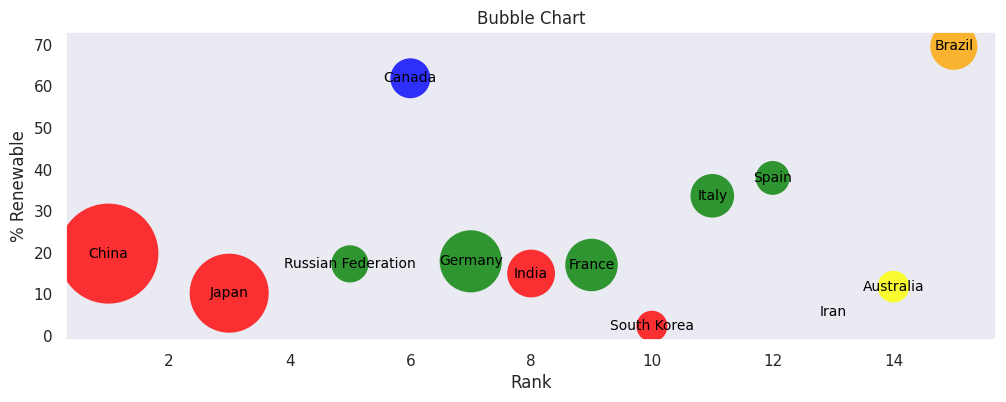

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

continent_colors = {
    'Asia': 'red',
    'Australia': 'yellow',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange'
}

plt.figure(figsize=(12, 4))

bubble_chart = sns.scatterplot(x='Rank', y='% Renewable', size='2015', hue='Continent', data=Result, sizes=(500, 10000),
                               alpha=0.8, palette=continent_colors, edgecolor=None, linewidth=0)
bubble_chart.legend().set_visible(False)
bubble_chart.grid(False)

for index, row in Result.iterrows():
    bubble_chart.annotate(index, xy=(row['Rank'], row['% Renewable']), xytext=(0, 0),
                          textcoords='offset points', ha='center', va='center', fontsize=10, color='black')

plt.title('Bubble Chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

plt.show()

## <a href="https://github.com/iayefimenko/Python_Lab3">Посилання</a> на створений блокнот Jupyter на GitHub

## Висновки
**Під час виконання лабораторної роботи №3 було глибше розлянуто бібліотеку мови Python Pandas та особливості її використання 
для злиття, агрегування та візуалізації даних. Також було здобуто новий досвід роботи в середовищі Jupyter Notebook та 
покращено навички роботи з блокнотом. Отримані знання в ході виконання завдань лабораторної роботи №3 стануть в нагоді 
при подальшому програмуванні на Python.**